In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score
)

sns.set(style="whitegrid")

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

columns = ['NumGravidezes', 'Glicose', 'PressaoSanguinea', 'EspessuraPele',
           'Insulina', 'IMC', 'HistoricoDiabetes', 'Idade', 'Resultado']

df = pd.read_csv(url, header=None, names=columns)

df.head()

,NumGravidezes,Glicose,PressaoSanguinea,EspessuraPele,Insulina,IMC,HistoricoDiabetes,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,NumGravidezes,Glicose,PressaoSanguinea,EspessuraPele,Insulina,IMC,HistoricoDiabetes,Idade,Resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()

NumGravidezes        0
Glicose              0
PressaoSanguinea     0
EspessuraPele        0
Insulina             0
IMC                  0
HistoricoDiabetes    0
Idade                0
Resultado            0
dtype: int64

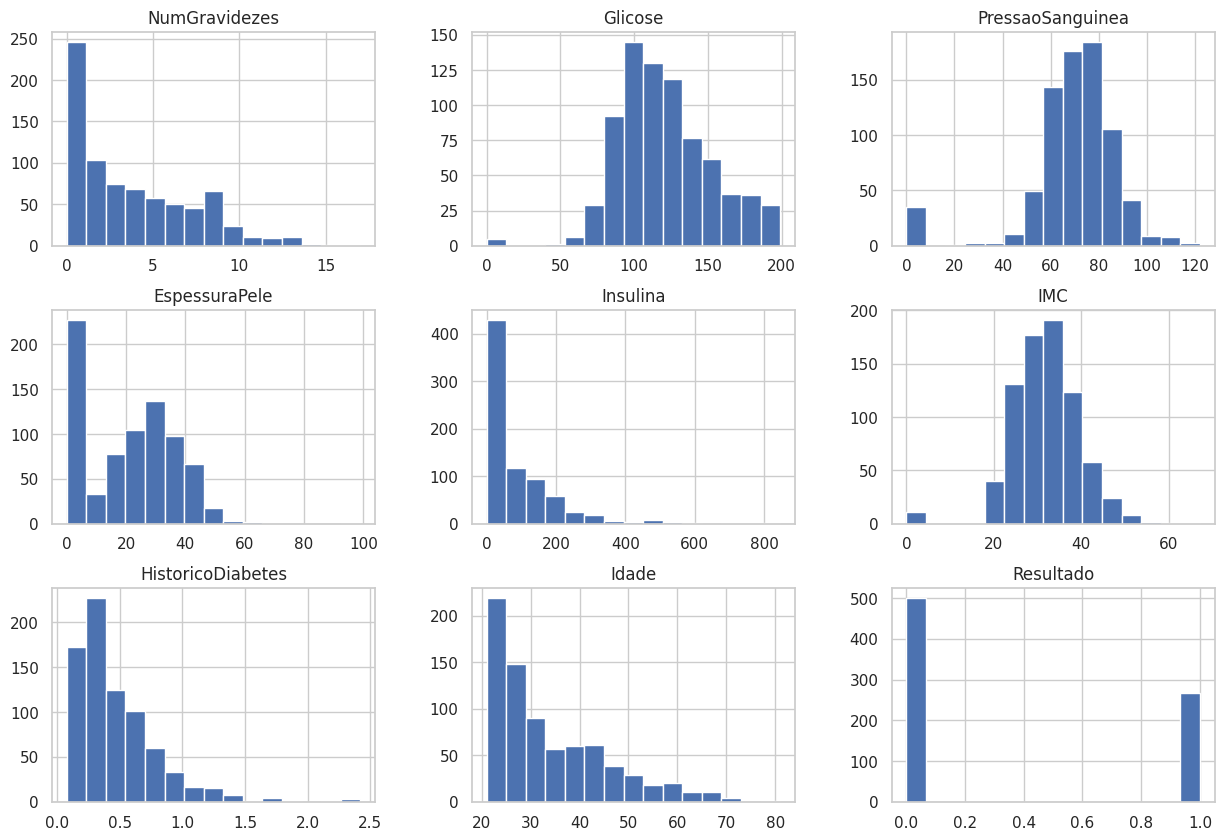

In [5]:
df.hist(bins=15, figsize=(15, 10))
plt.show()

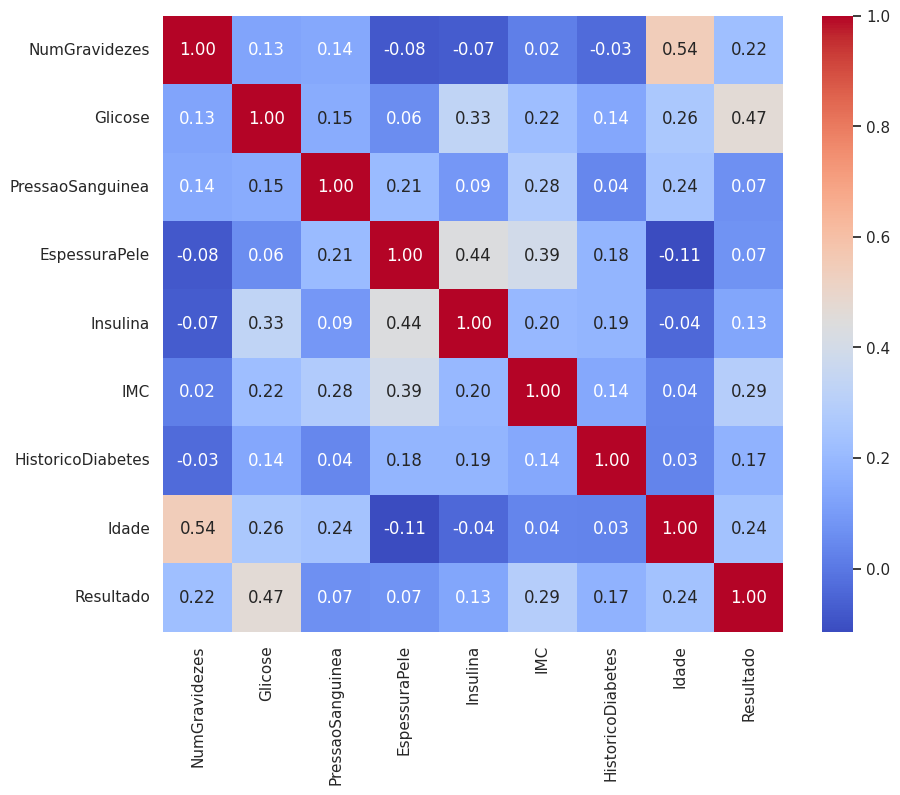

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [8]:
df.fillna(df.median(), inplace=True)

In [9]:
x = df.drop('Resultado', axis=1)
y = df['Resultado']

In [10]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

In [13]:
y_pred = model.predict(x_test)

In [14]:
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix,
    classification_report
)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Reports:")
print(report)

Accuracy: 0.7532
Confusion matrix:
[[79 20]
 [18 37]]
Classification Reports:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print(f"Size of X_train_smote: {x_train_smote.shape}")
print(f"Size of y_train_smote: {y_train_smote.shape}")


Size of X_train_smote: (802, 8)
Size of y_train_smote: (802,)


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(x_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(x_test)


from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report
)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Reports (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Accuracy (Random Forest): 0.7597402597402597
Confusion Matrix (Random Forest):
[[75 24]
 [13 42]]
Classification Reports (Random Forest):
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        99
           1       0.64      0.76      0.69        55

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.78      0.76      0.76       154

